In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data",names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [4]:
df["class"] = (df["class"] == "g").astype(int)
df.head()


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [5]:
# for label in cols[:-1]:
#     plt.hist(df[df["class"]==1][label],color = 'blue', label = 'gamma', alpha = 0.7, density = True)
#     plt.hist(df[df["class"]==0][label],color = 'red', label = 'hydron', alpha = 0.7, density = True)
#     plt.title(label)
#     plt.ylabel("Probability")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()


<span style="background-color: brown; font-size: 30px;">Train,Validation, Test datasets</span>


In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

C:\Users\ShadowLord\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<span style="background-color:brown; font-size:15px;">np.split(array, [index1, index2]) → splits into [0:index1], [index1:index2], [index2:end]</span>

In [7]:
def scale_dataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values #[[1,2,3],[2,3,4],[3,4,5],[4,5,6]] shape[4,3]-{n_samples, n_features}
    Y = dataframe[dataframe.columns[-1]].values #[1,2,3]

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    data  = np.hstack((X, np.reshape(Y, (-1,1))))

    return data, X, Y

In [8]:
# print(len(train[train["class"] == 1])) #7408
# print(len(train[train["class"] == 0])) #4004

In [9]:
train , X_train, Y_train = scale_dataset(train, oversample = True)
valid , X_valid, Y_valid = scale_dataset(valid, oversample = False)
test , X_test, Y_test = scale_dataset(test, oversample = False)

<span style="background-color:brown; font-size: 20px">kNN (k-nearest neighbors)</span>

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model = knn_model.fit(X_train,Y_train)

In [12]:
Y_pred = knn_model.predict(X_test)
#Y_pred array([0, 0, 0, ..., 0, 0, 1])
#Y_test array([1, 0, 0, ..., 0, 0, 1])

In [13]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1305
           1       0.86      0.86      0.86      2499

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



<span style="background-color:brown; font-size:20px">Naive Bayes</span>

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,Y_train)

In [16]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.40      0.49      1305
           1       0.74      0.87      0.80      2499

    accuracy                           0.71      3804
   macro avg       0.68      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



<span style="background-color:brown; font-size:20px">Logistic Regression</span>

<span style="background-color:green; font-size:20px">The sigmoid function $\sigma(y) = \frac{1}{1 + e^{-y}}$ is commonly used in machine learning.</span>


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,Y_train)

In [19]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1305
           1       0.85      0.81      0.83      2499

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



<span style="background-color:brown; font-size:20px">Support Vector Machines(SVM)</span>

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC()
svm_model  = svm_model.fit(X_train,Y_train)

In [22]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1305
           1       0.90      0.89      0.89      2499

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



<span style="background-color:brown; font-size:20px">Neural Network</span>

In [31]:
import tensorflow as tf

In [45]:
def plot_history(history):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,6))
    ax1.plot(history.history['loss'],label = 'loss')
    ax1.plot(history.history['val_loss'],label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'],label = 'accuracy')
    ax2.plot(history.history['val_accuracy'],label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax1.grid(True)
    
    plt.show()
               
# def plot_accuracy(history):
#     plt.plot(history.history['accuracy'],label = 'accuracy')
#     plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [46]:
def train_model(X_trian, Y_train, num_nodes, dropout_prob, lr, batch_size,epochs):

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ]
    )
    
    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    history = nn_model.fit(
    X_train,Y_train,
    epochs = epochs, batch_size = batch_size , validation_split=0.2 , verbose = 0
    ) 

    return nn_model , history

In [47]:
# history = nn_model.fit(
#     X_train,Y_train,
#     epochs = 100, batch_size = 32 , validation_split=0.2 , verbose = 0
# )                   

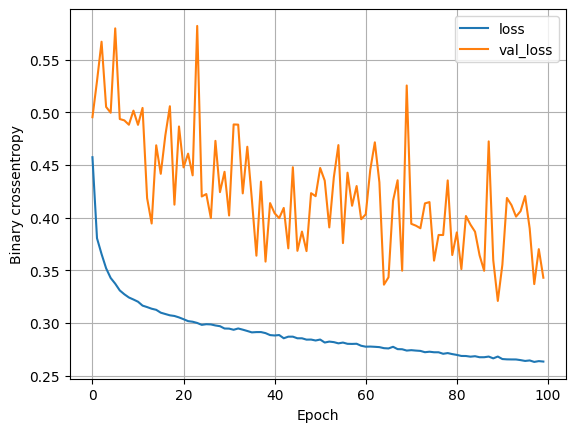

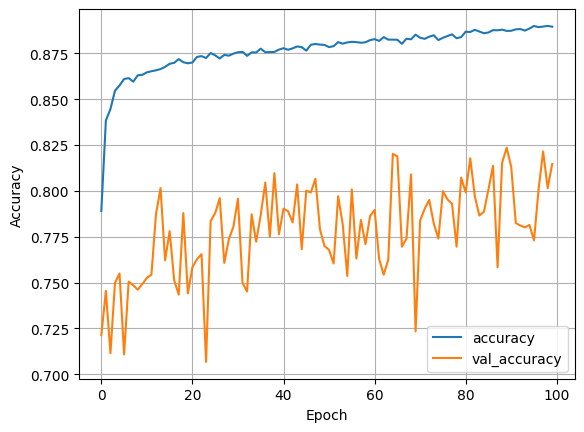

In [35]:
# plot_loss(history)
# plot_accuracy(history)

nodes: 16,dropout: 0 lr: 0.01 batch_size: 32


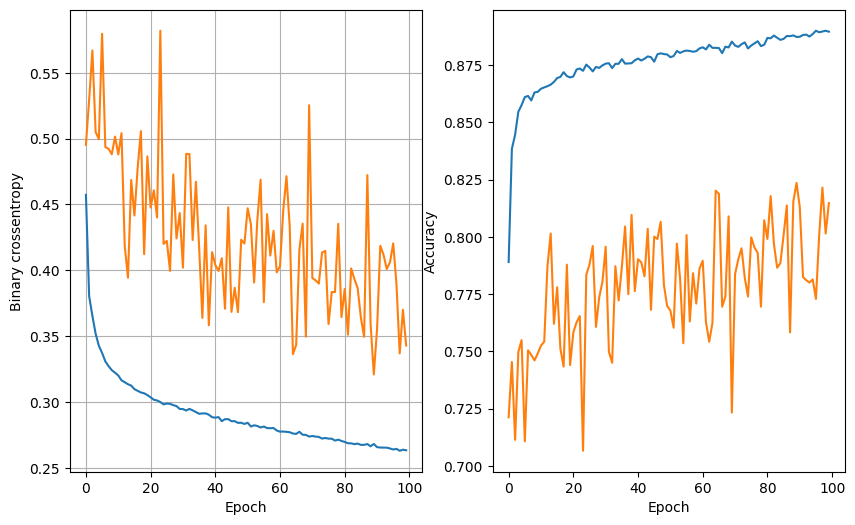

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8705 - loss: 0.3308
nodes: 16,dropout: 0 lr: 0.01 batch_size: 64


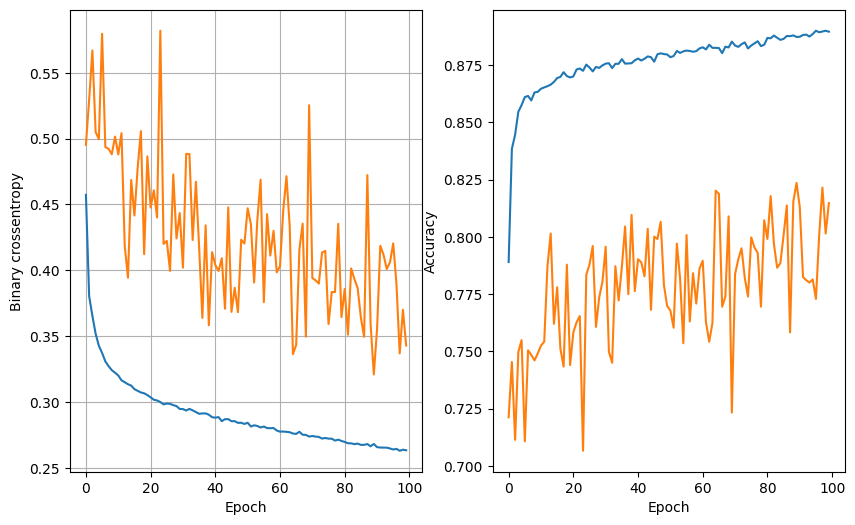

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8739 - loss: 0.3142
nodes: 16,dropout: 0 lr: 0.01 batch_size: 128


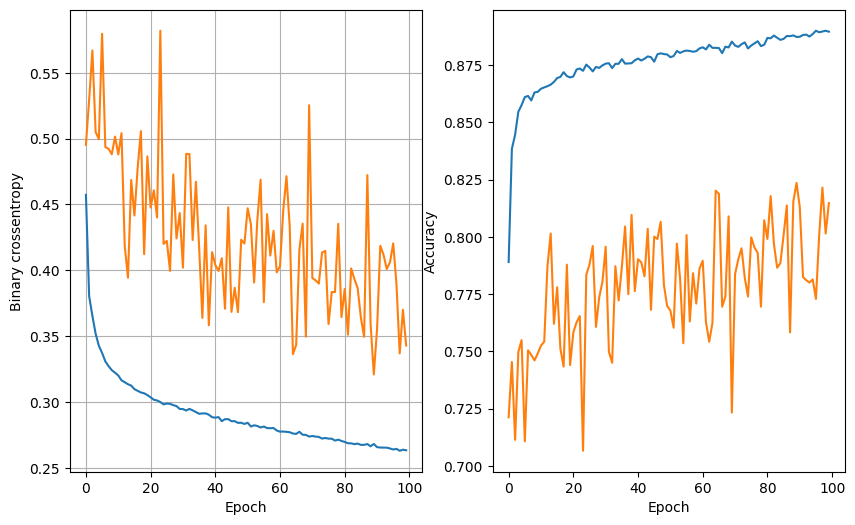

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8727 - loss: 0.3091
nodes: 16,dropout: 0 lr: 0.005 batch_size: 32


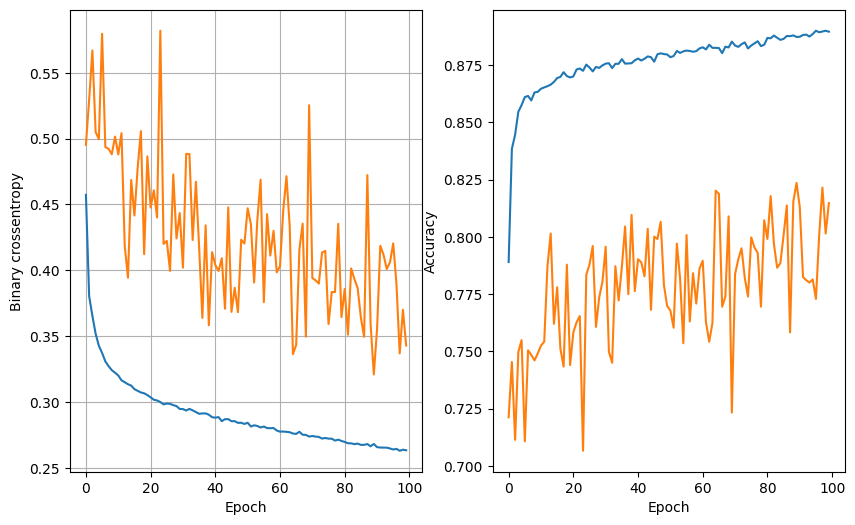

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.8671 - loss: 0.3188
nodes: 16,dropout: 0 lr: 0.005 batch_size: 64


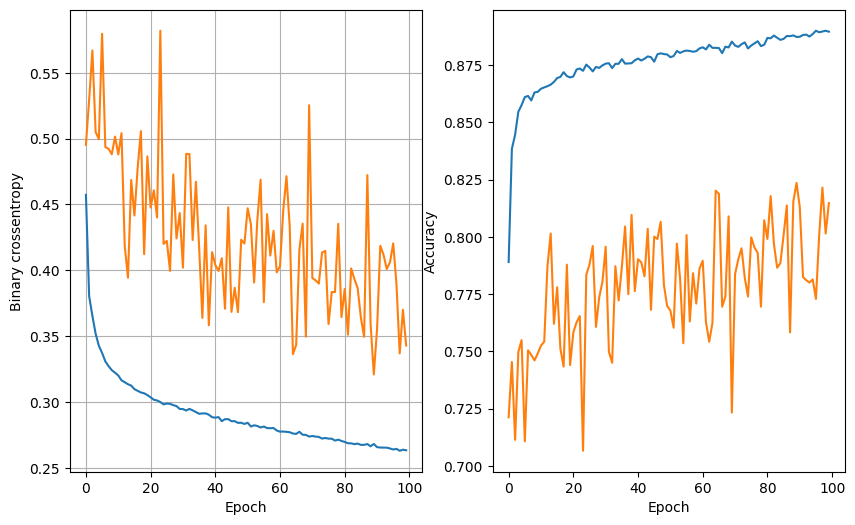

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8798 - loss: 0.3162
nodes: 16,dropout: 0 lr: 0.005 batch_size: 128


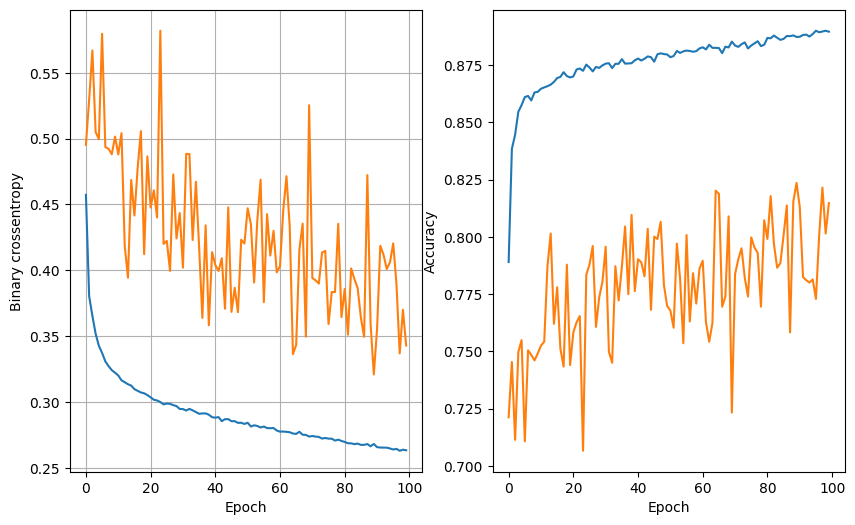

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8748 - loss: 0.3177
nodes: 16,dropout: 0 lr: 0.001 batch_size: 32


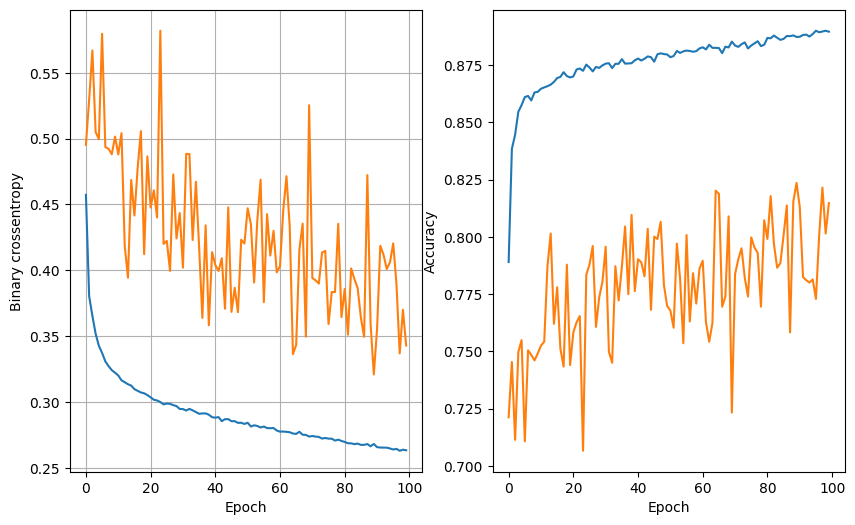

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8777 - loss: 0.3069
nodes: 16,dropout: 0 lr: 0.001 batch_size: 64


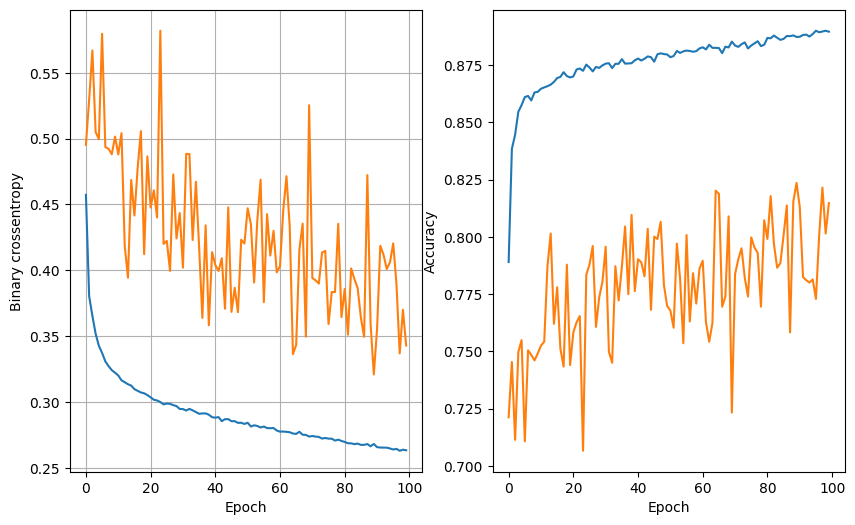

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8762 - loss: 0.3054
nodes: 16,dropout: 0 lr: 0.001 batch_size: 128


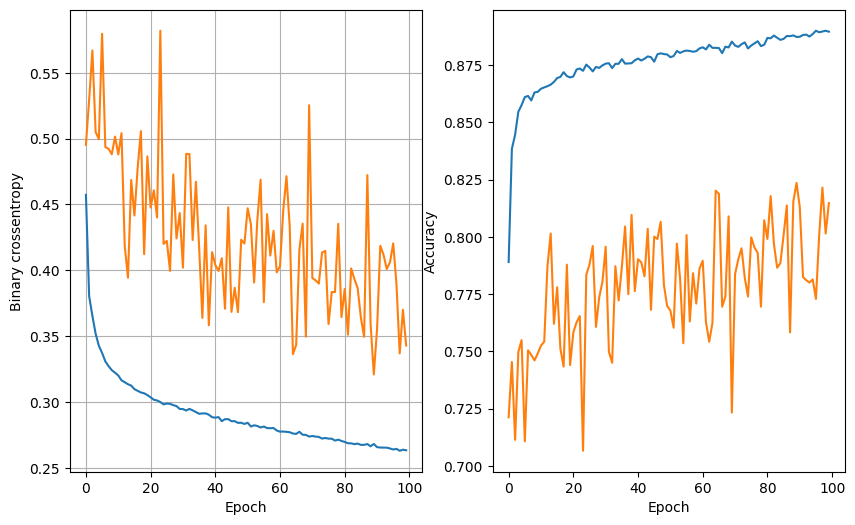

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8775 - loss: 0.3020
nodes: 16,dropout: 0.2 lr: 0.01 batch_size: 32


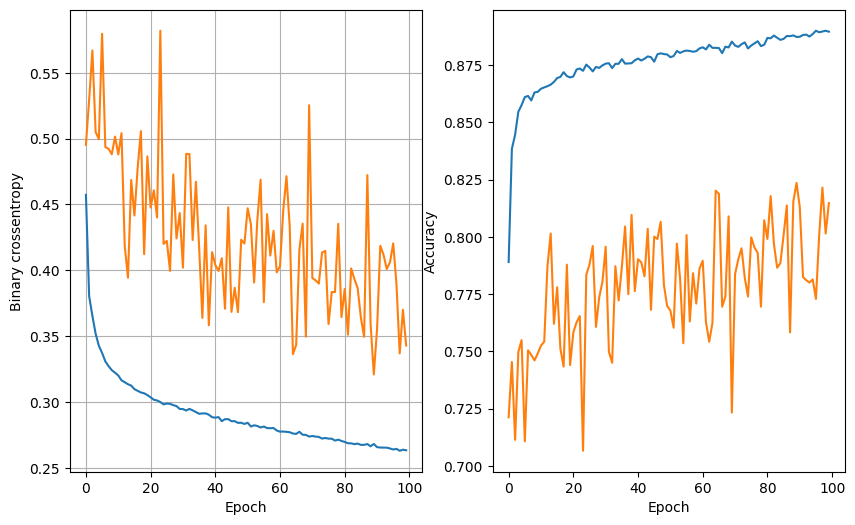

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8751 - loss: 0.3199
nodes: 16,dropout: 0.2 lr: 0.01 batch_size: 64


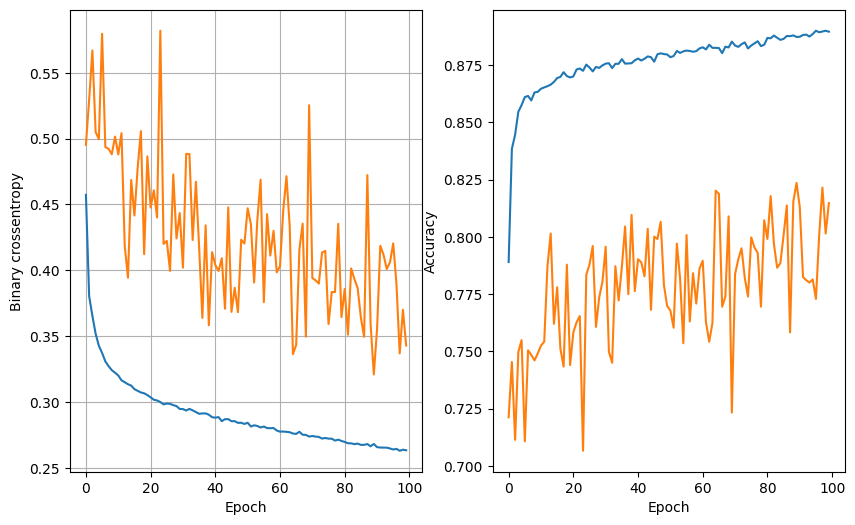

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8717 - loss: 0.3027
nodes: 16,dropout: 0.2 lr: 0.01 batch_size: 128


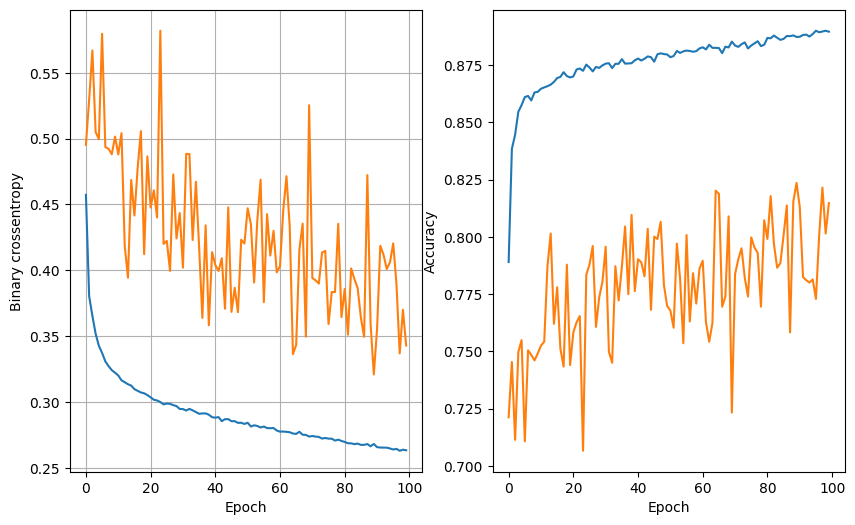

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8720 - loss: 0.3157
nodes: 16,dropout: 0.2 lr: 0.005 batch_size: 32


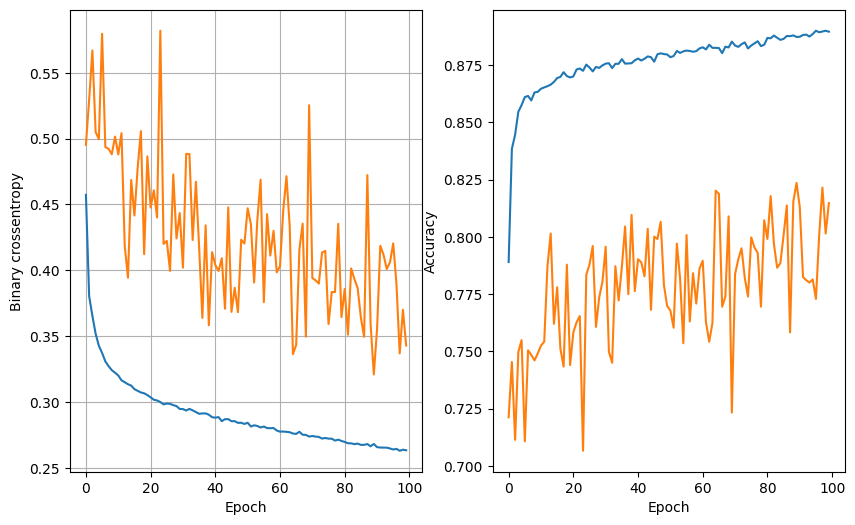

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8709 - loss: 0.3114
nodes: 16,dropout: 0.2 lr: 0.005 batch_size: 64


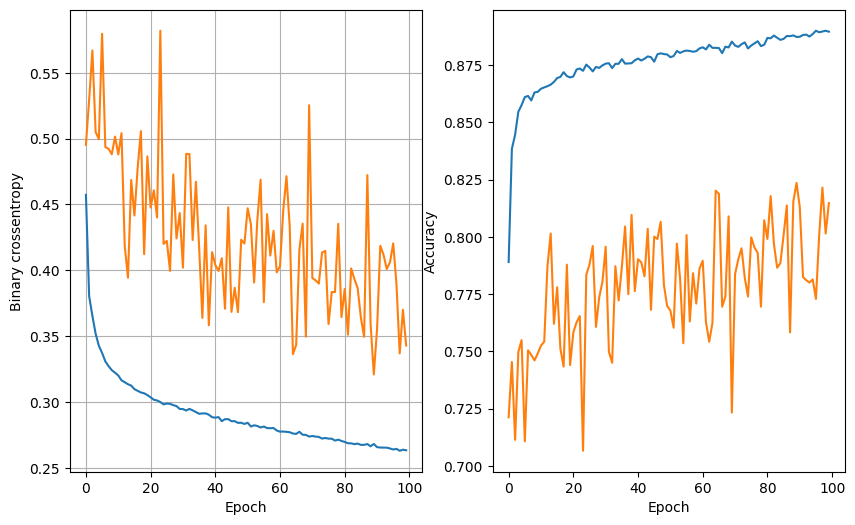

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8751 - loss: 0.3102
nodes: 16,dropout: 0.2 lr: 0.005 batch_size: 128


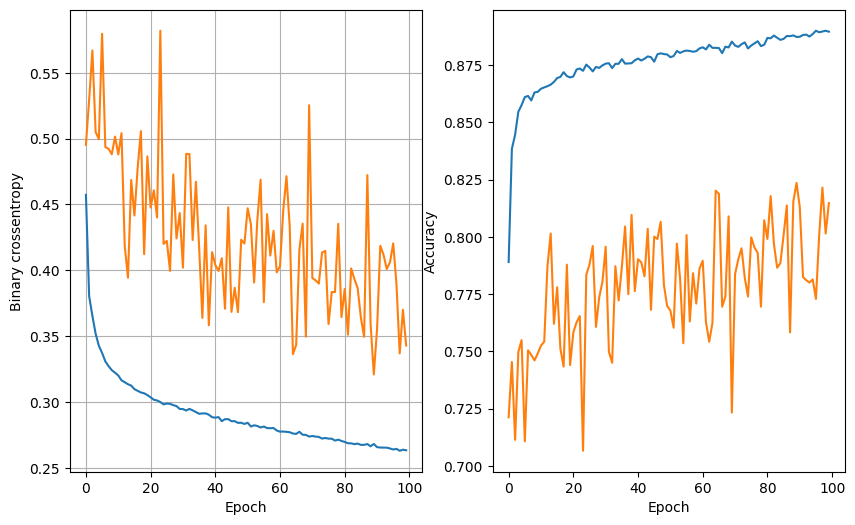

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8679 - loss: 0.3028
nodes: 16,dropout: 0.2 lr: 0.001 batch_size: 32


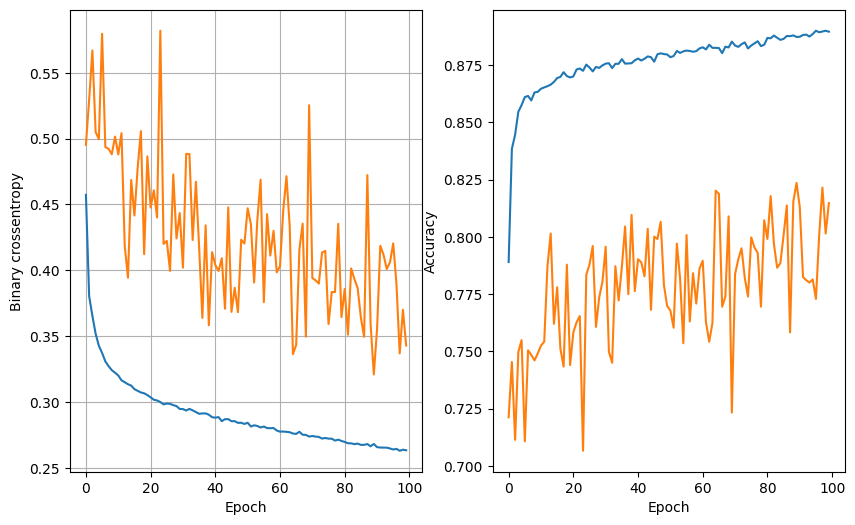

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.8745 - loss: 0.3076
nodes: 16,dropout: 0.2 lr: 0.001 batch_size: 64


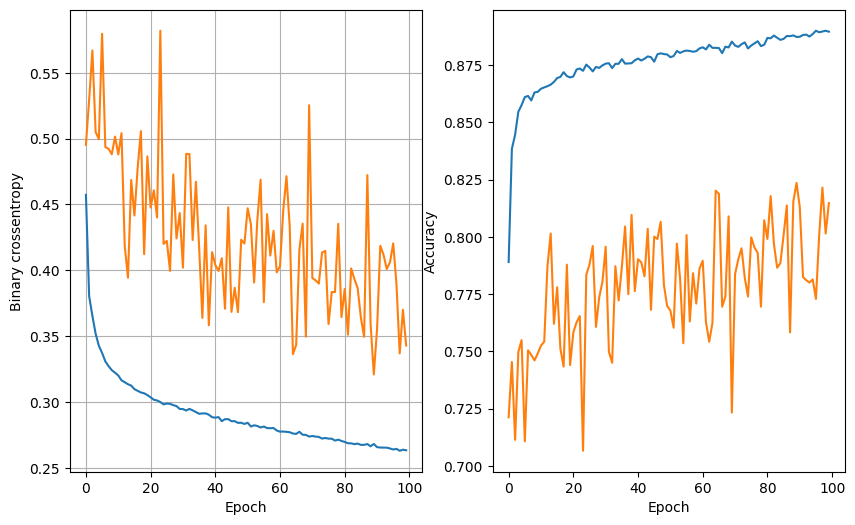

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.8773 - loss: 0.3126
nodes: 16,dropout: 0.2 lr: 0.001 batch_size: 128


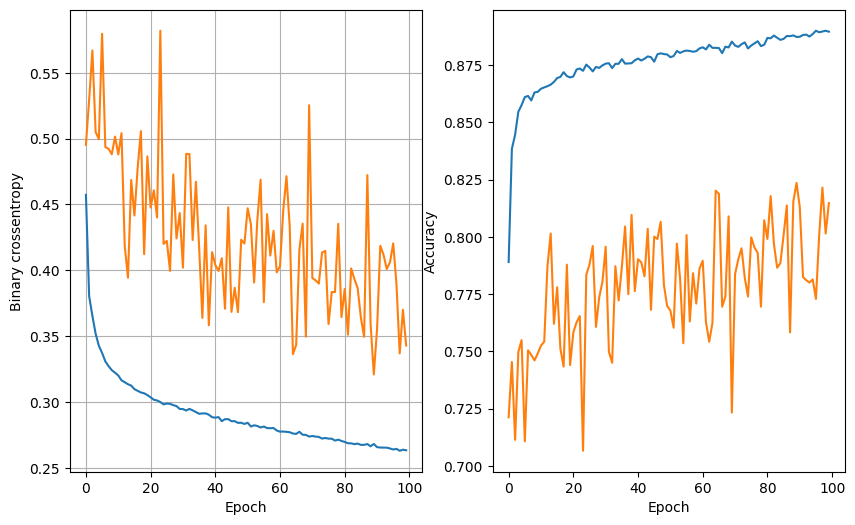

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8729 - loss: 0.3088
nodes: 32,dropout: 0 lr: 0.01 batch_size: 32


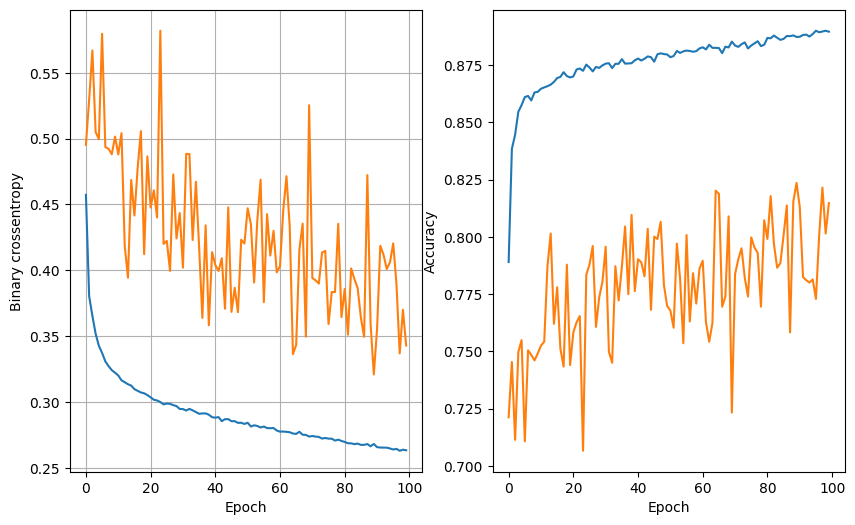

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8704 - loss: 0.3733
nodes: 32,dropout: 0 lr: 0.01 batch_size: 64


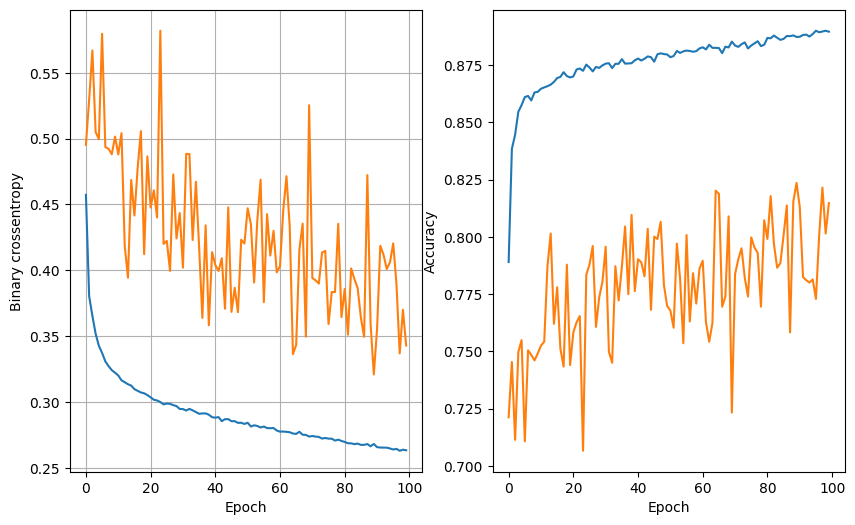

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8616 - loss: 0.3825
nodes: 32,dropout: 0 lr: 0.01 batch_size: 128


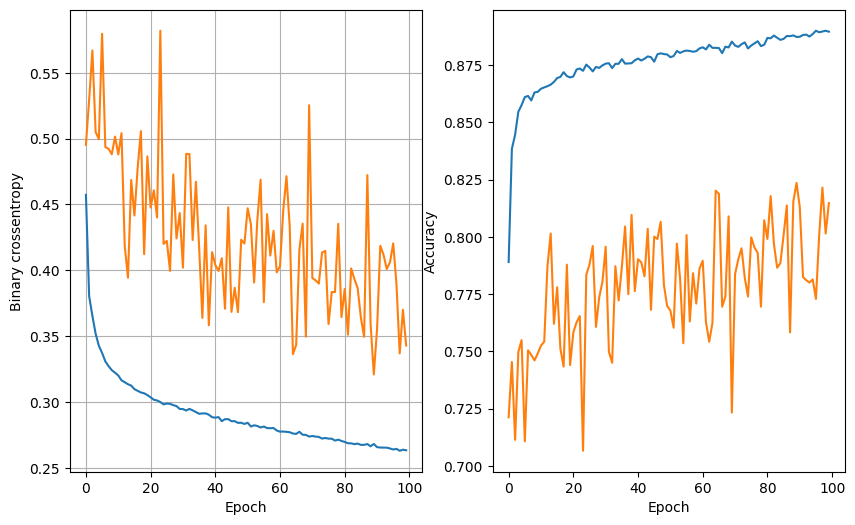

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.8693 - loss: 0.3852
nodes: 32,dropout: 0 lr: 0.005 batch_size: 32


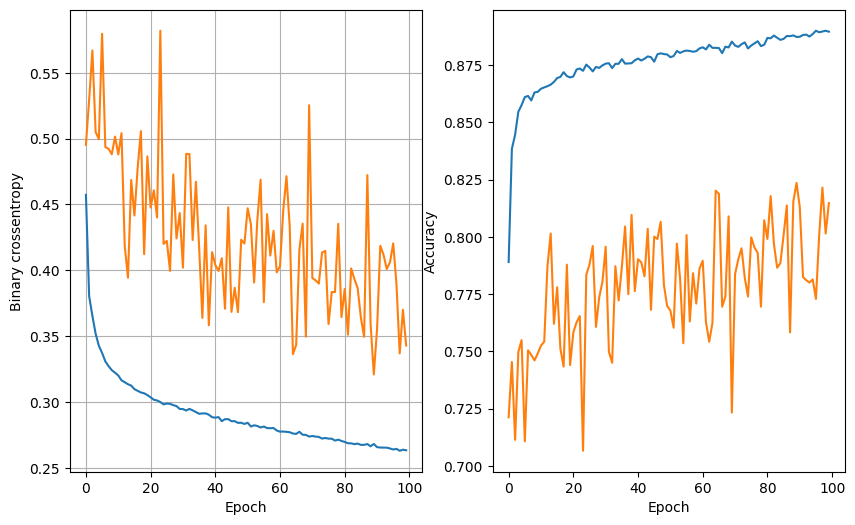

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.8678 - loss: 0.3528
nodes: 32,dropout: 0 lr: 0.005 batch_size: 64


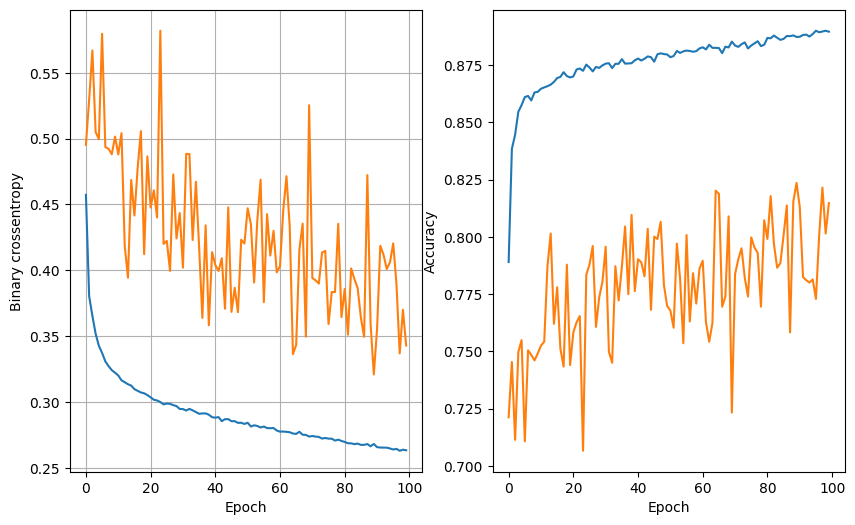

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8673 - loss: 0.3564
nodes: 32,dropout: 0 lr: 0.005 batch_size: 128


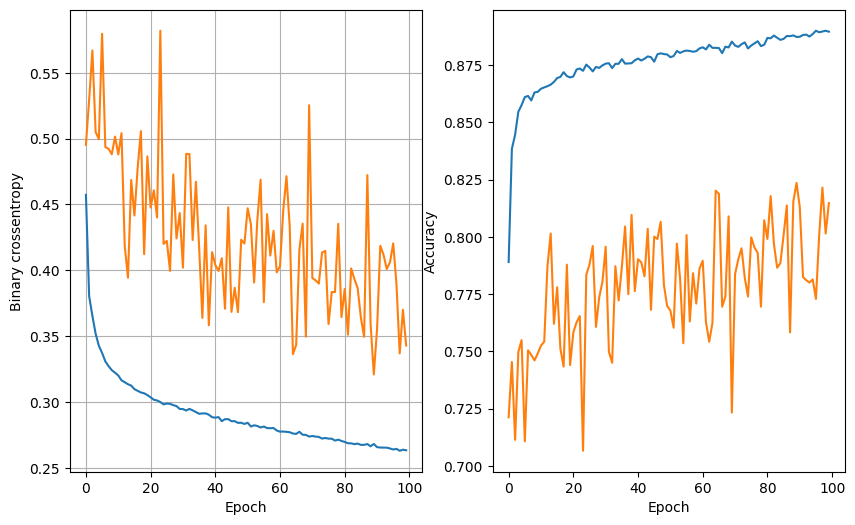

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.8659 - loss: 0.3417
nodes: 32,dropout: 0 lr: 0.001 batch_size: 32


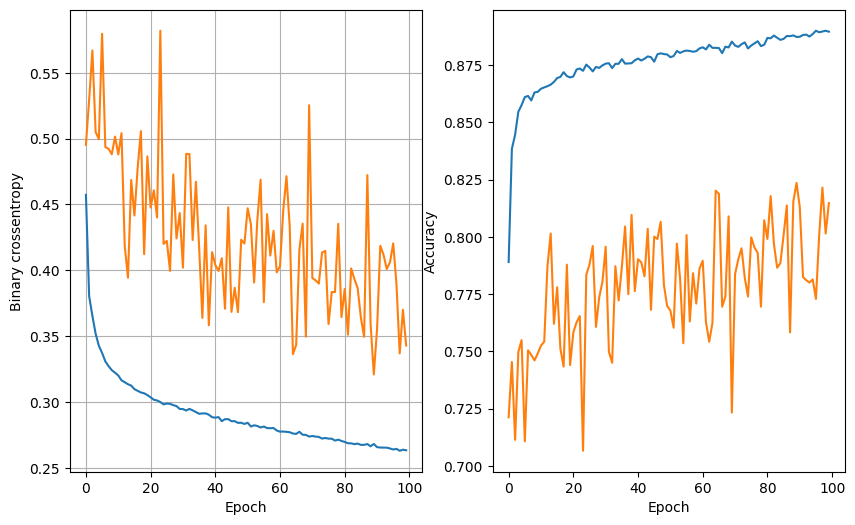

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8681 - loss: 0.3157
nodes: 32,dropout: 0 lr: 0.001 batch_size: 64


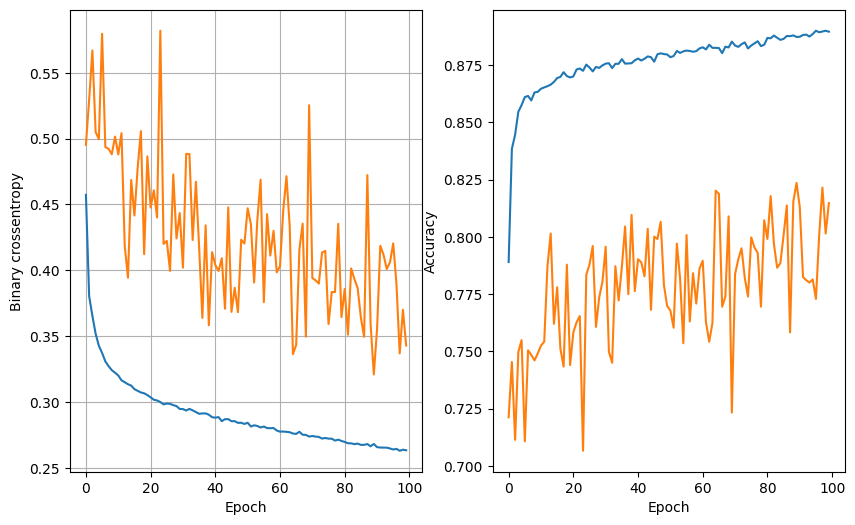

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8706 - loss: 0.3054
nodes: 32,dropout: 0 lr: 0.001 batch_size: 128


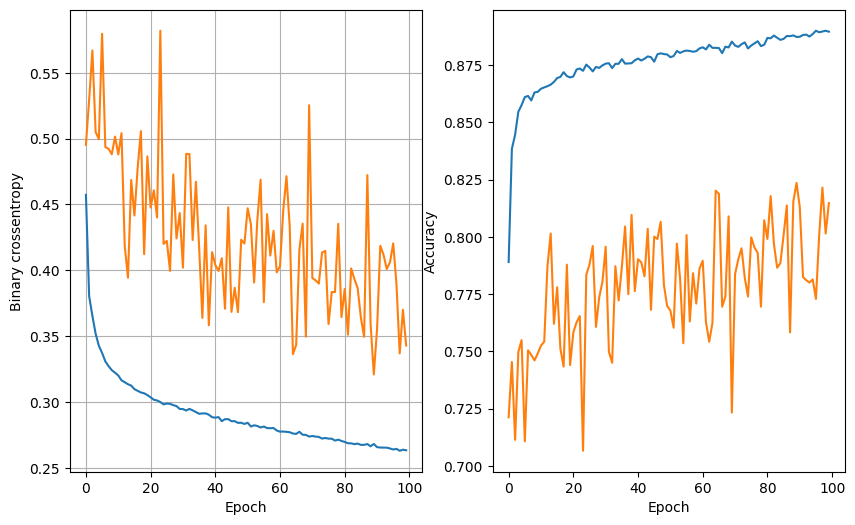

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8744 - loss: 0.3040
nodes: 32,dropout: 0.2 lr: 0.01 batch_size: 32


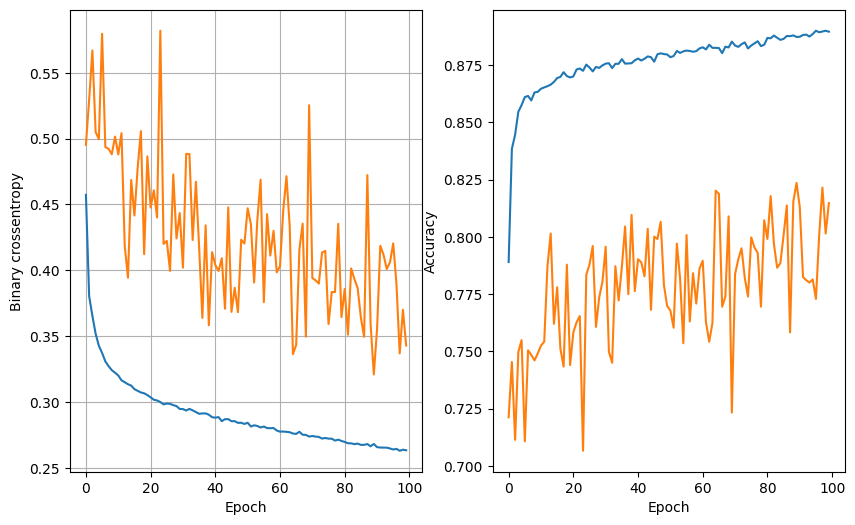

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8734 - loss: 0.3062
nodes: 32,dropout: 0.2 lr: 0.01 batch_size: 64


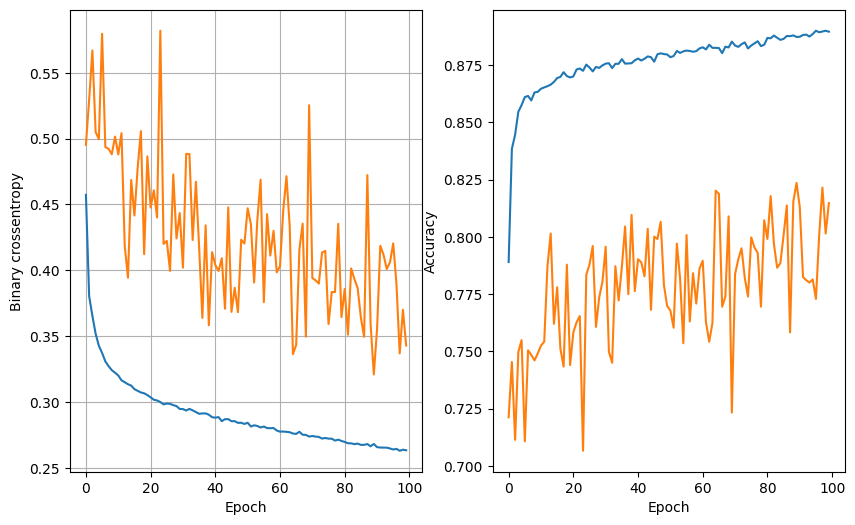

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8785 - loss: 0.3005
nodes: 32,dropout: 0.2 lr: 0.01 batch_size: 128


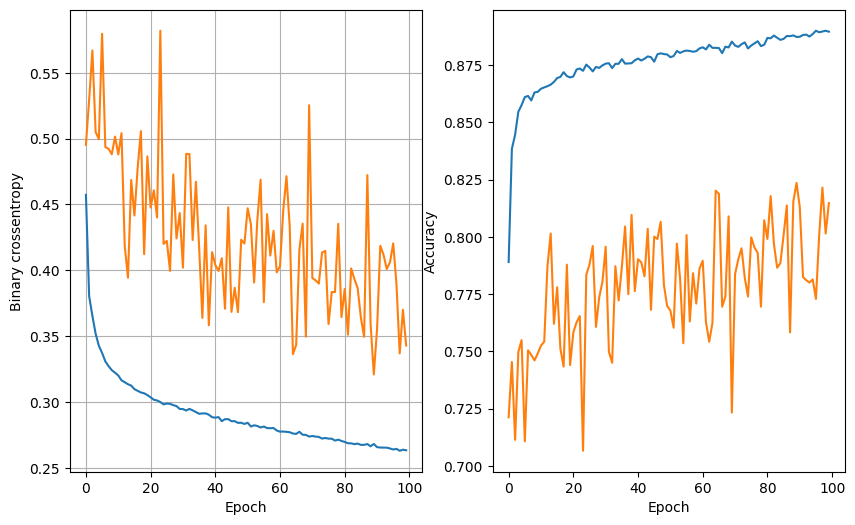

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8765 - loss: 0.2991
nodes: 32,dropout: 0.2 lr: 0.005 batch_size: 32


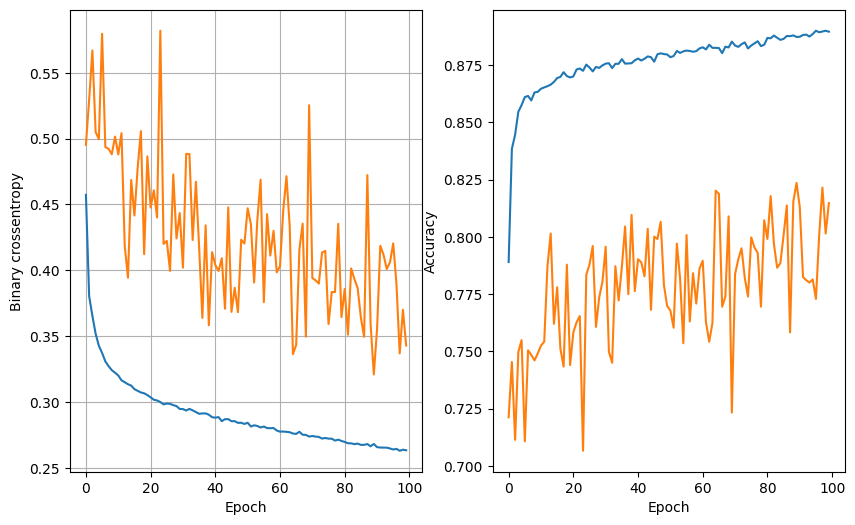

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8773 - loss: 0.3011
nodes: 32,dropout: 0.2 lr: 0.005 batch_size: 64


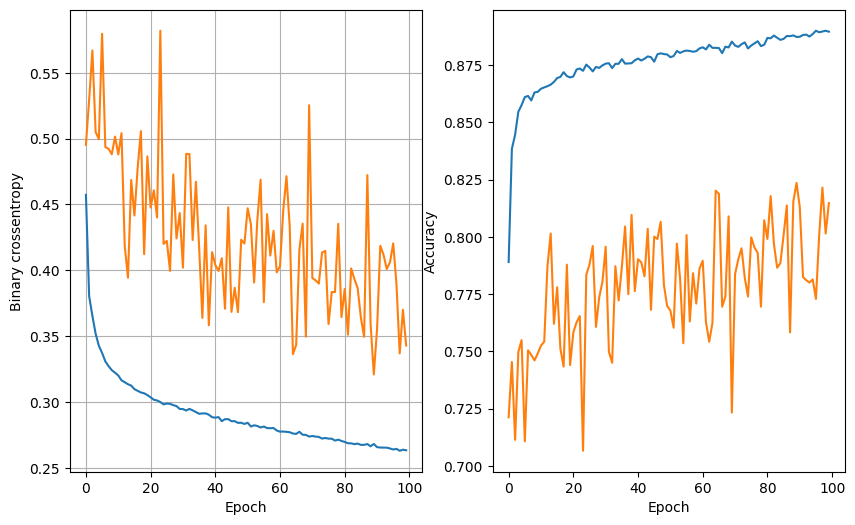

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8777 - loss: 0.2936
nodes: 32,dropout: 0.2 lr: 0.005 batch_size: 128


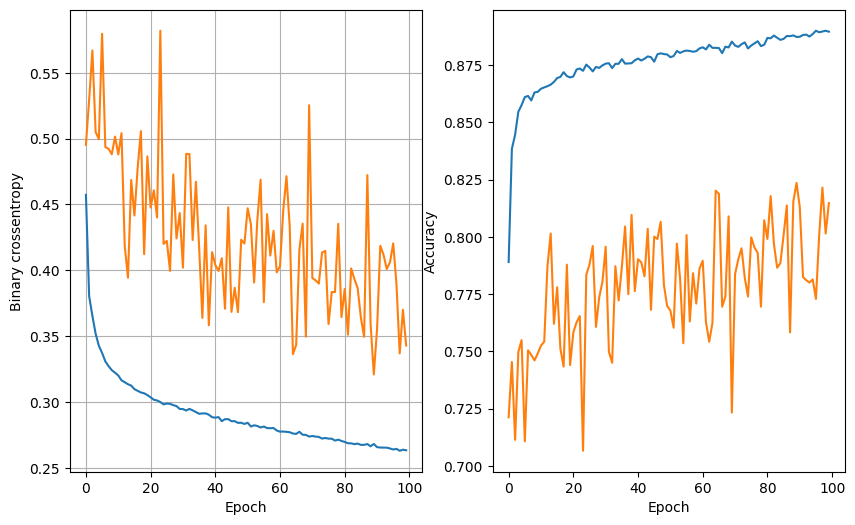

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8704 - loss: 0.2984
nodes: 32,dropout: 0.2 lr: 0.001 batch_size: 32


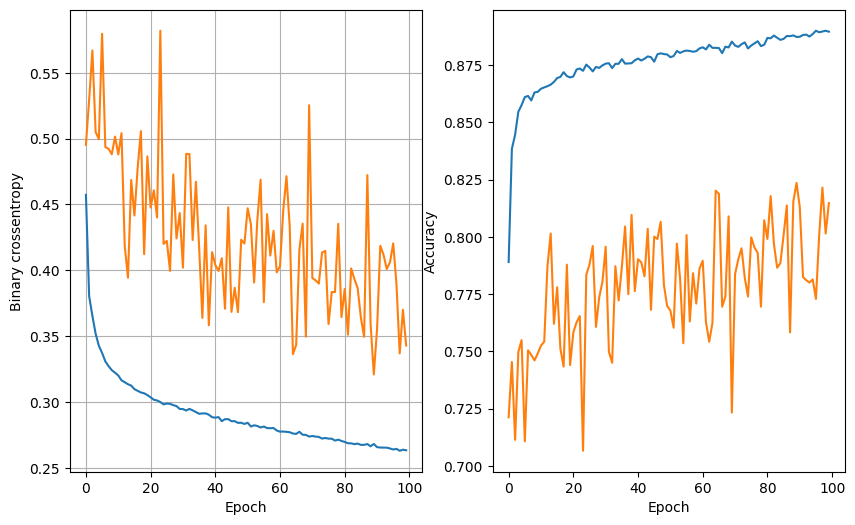

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8758 - loss: 0.2973
nodes: 32,dropout: 0.2 lr: 0.001 batch_size: 64


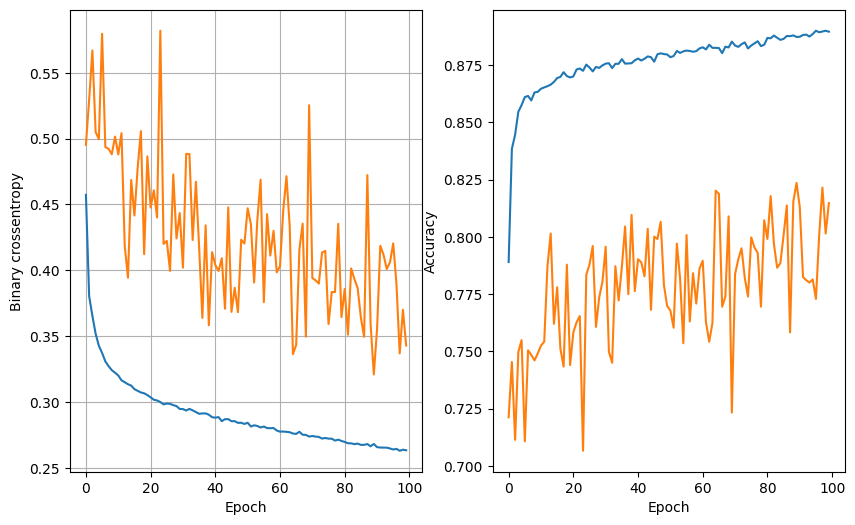

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8805 - loss: 0.2968
nodes: 32,dropout: 0.2 lr: 0.001 batch_size: 128


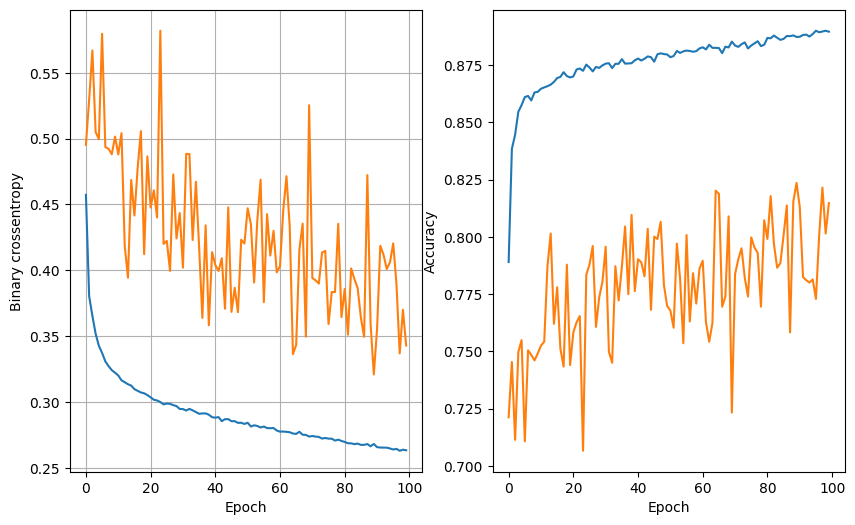

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8750 - loss: 0.3025
nodes: 64,dropout: 0 lr: 0.01 batch_size: 32


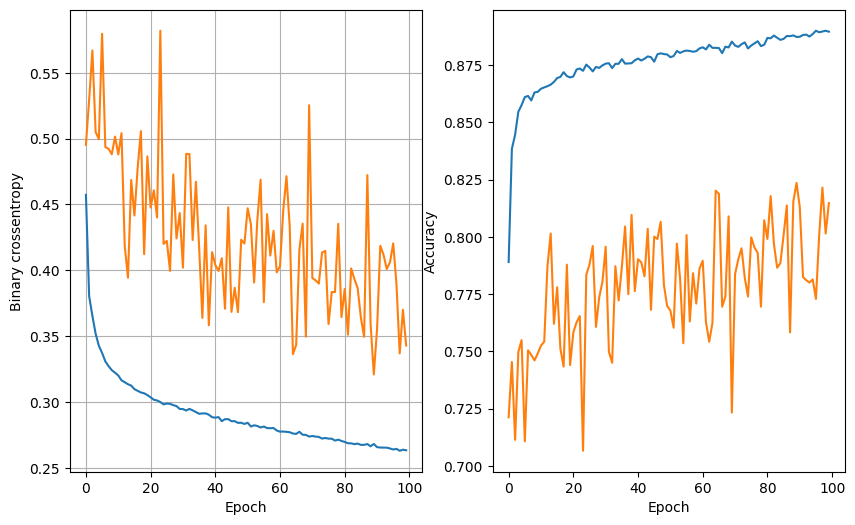

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8578 - loss: 0.4918
nodes: 64,dropout: 0 lr: 0.01 batch_size: 64


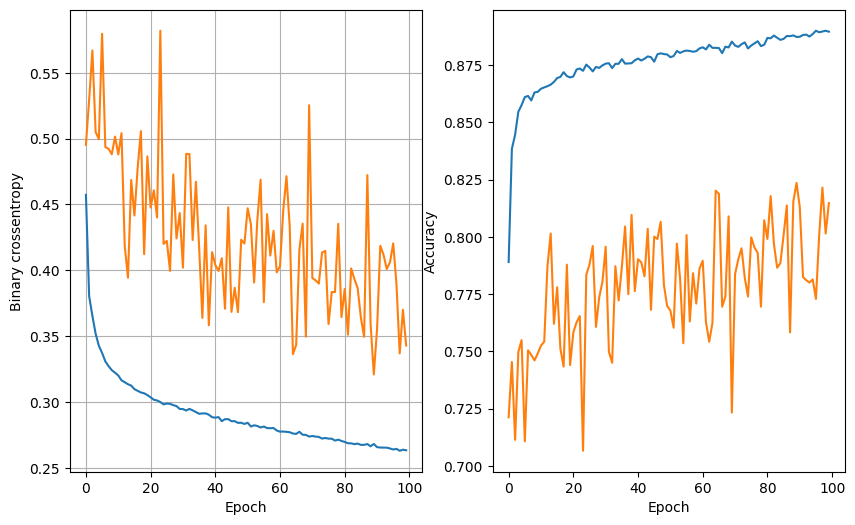

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.8581 - loss: 0.5961
nodes: 64,dropout: 0 lr: 0.01 batch_size: 128


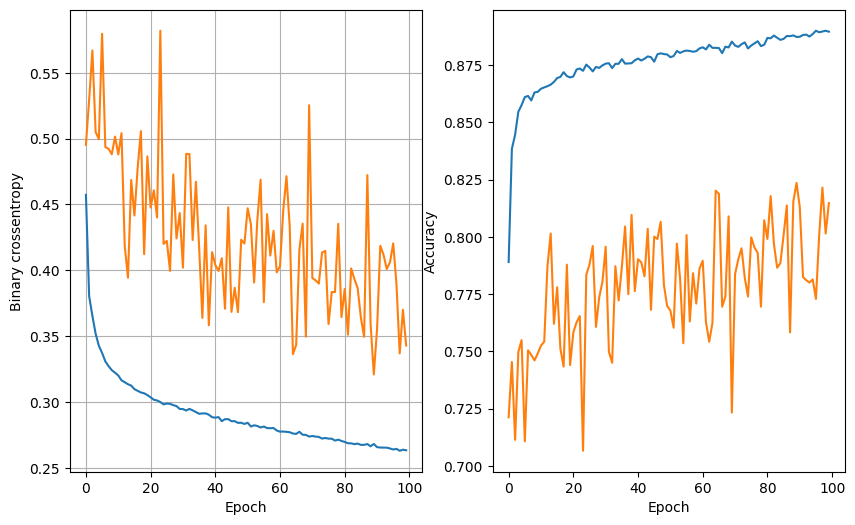

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8378 - loss: 0.6169
nodes: 64,dropout: 0 lr: 0.005 batch_size: 32


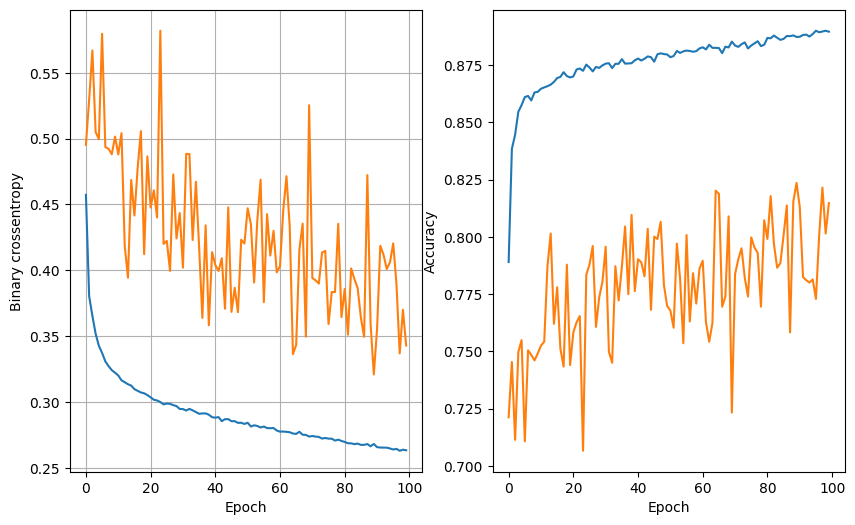

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.8580 - loss: 0.5550
nodes: 64,dropout: 0 lr: 0.005 batch_size: 64


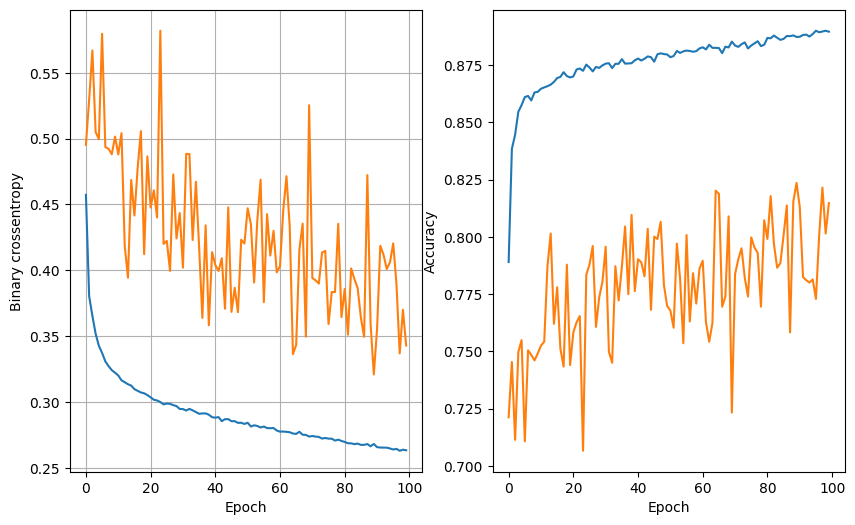

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.8561 - loss: 0.5196
nodes: 64,dropout: 0 lr: 0.005 batch_size: 128


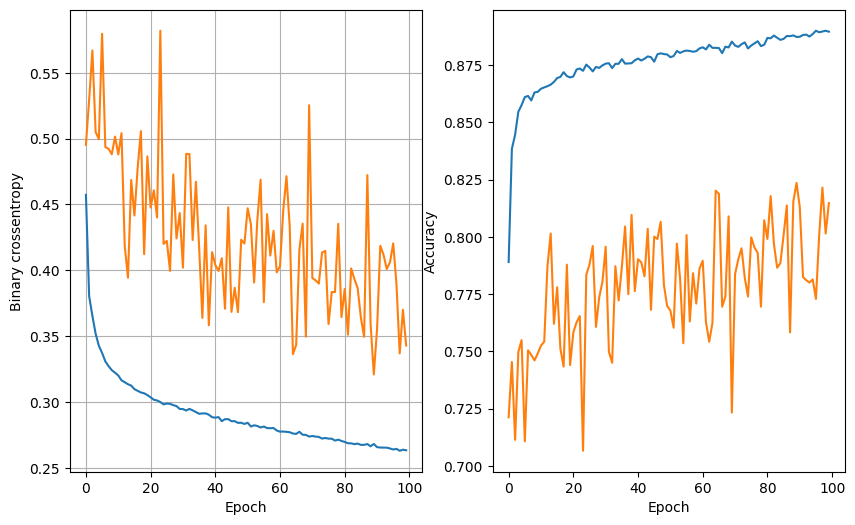

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8681 - loss: 0.4480
nodes: 64,dropout: 0 lr: 0.001 batch_size: 32


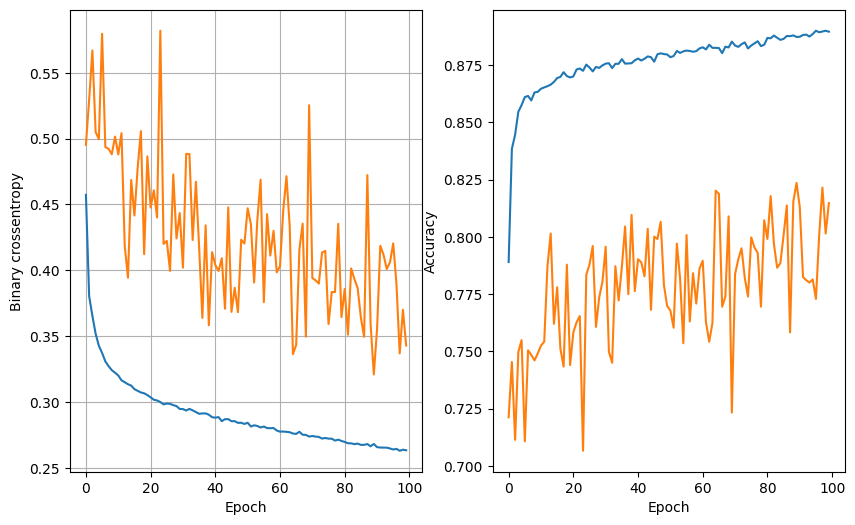

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8721 - loss: 0.3533
nodes: 64,dropout: 0 lr: 0.001 batch_size: 64


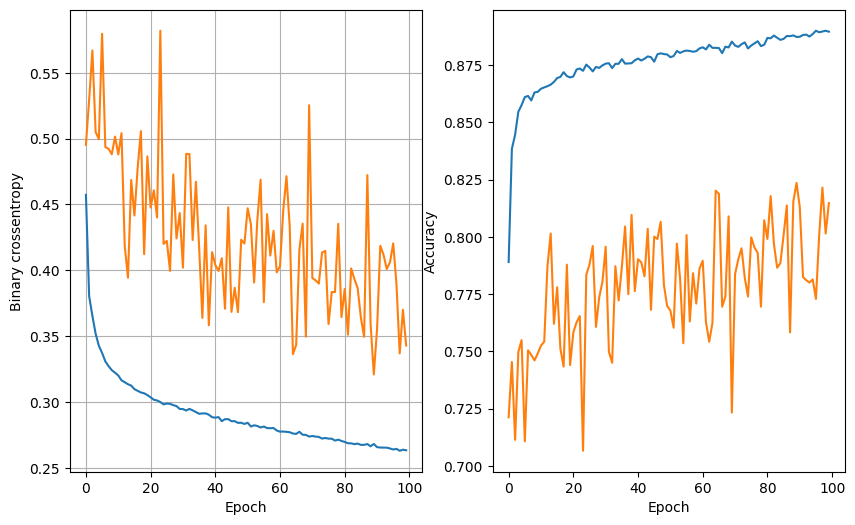

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8706 - loss: 0.3158
nodes: 64,dropout: 0 lr: 0.001 batch_size: 128


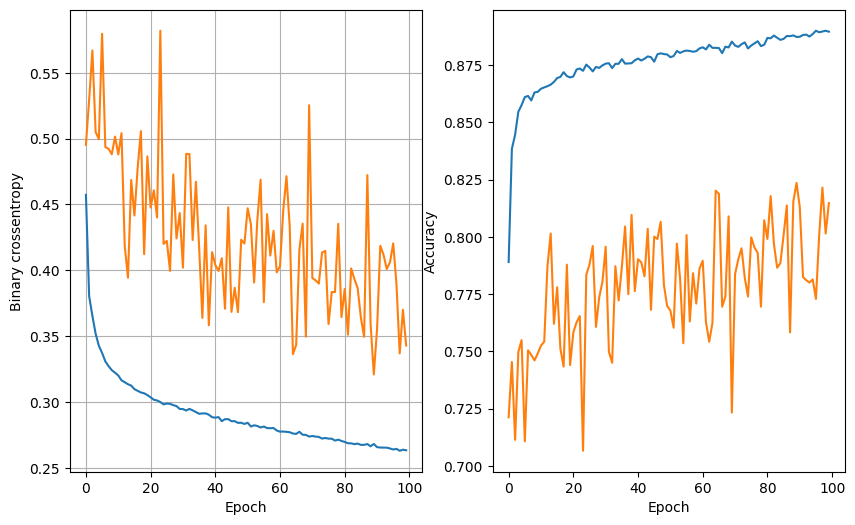

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.8745 - loss: 0.3104
nodes: 64,dropout: 0.2 lr: 0.01 batch_size: 32


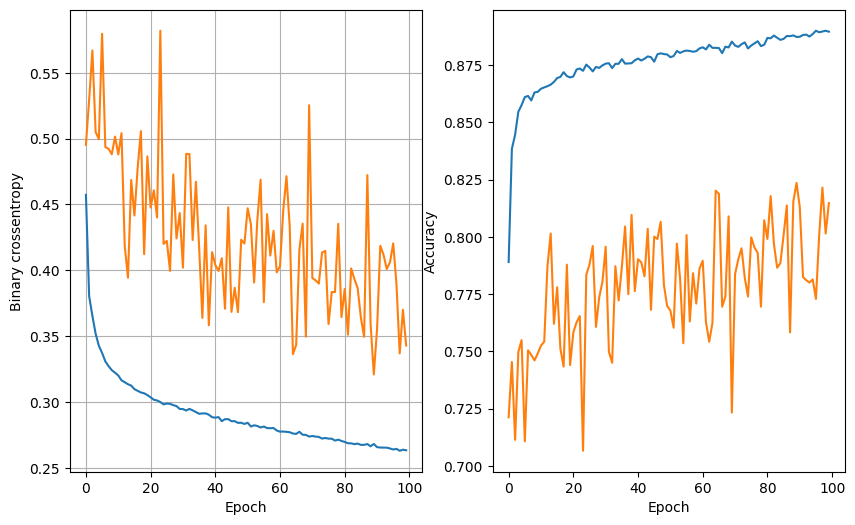

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8694 - loss: 0.3145
nodes: 64,dropout: 0.2 lr: 0.01 batch_size: 64


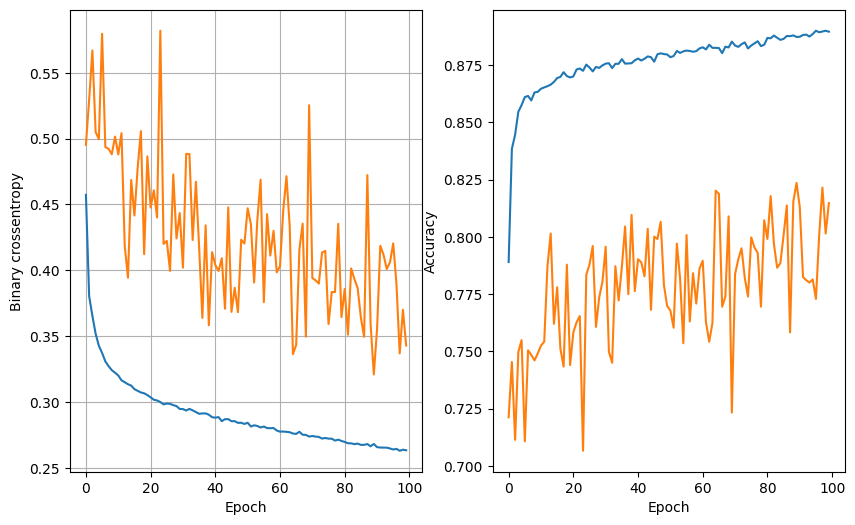

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8742 - loss: 0.3056
nodes: 64,dropout: 0.2 lr: 0.01 batch_size: 128


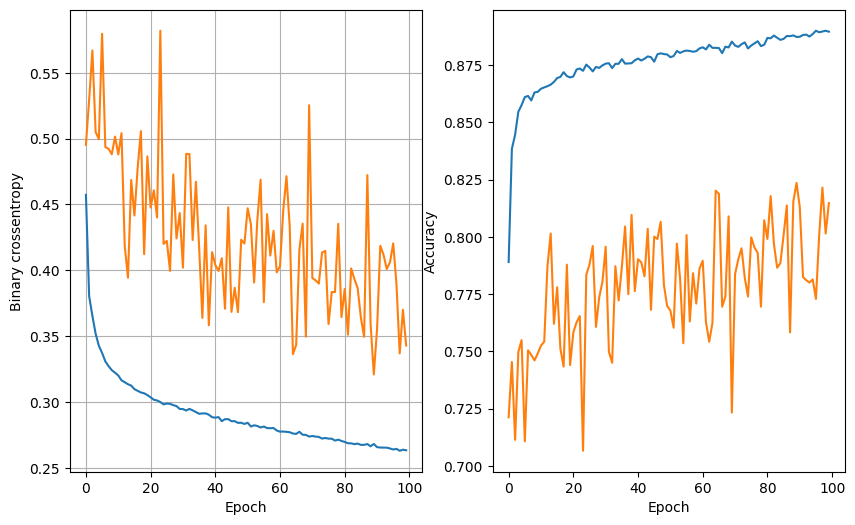

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8721 - loss: 0.3068
nodes: 64,dropout: 0.2 lr: 0.005 batch_size: 32


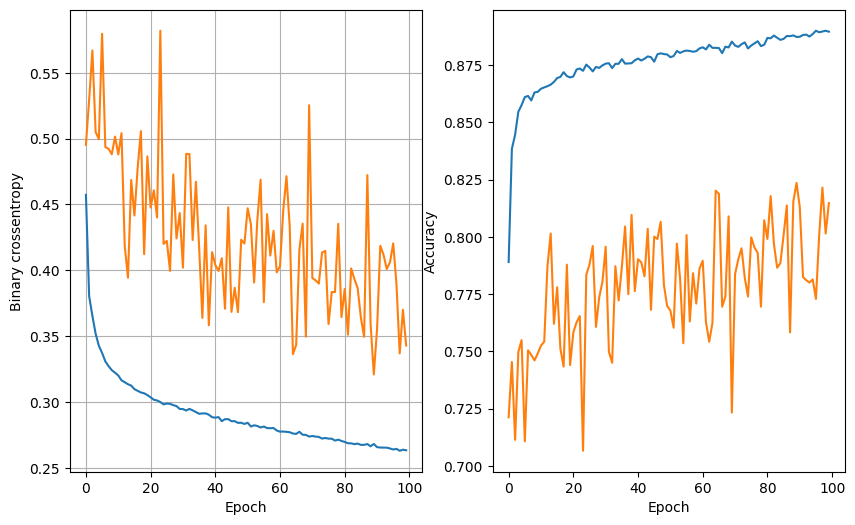

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8724 - loss: 0.3125
nodes: 64,dropout: 0.2 lr: 0.005 batch_size: 64


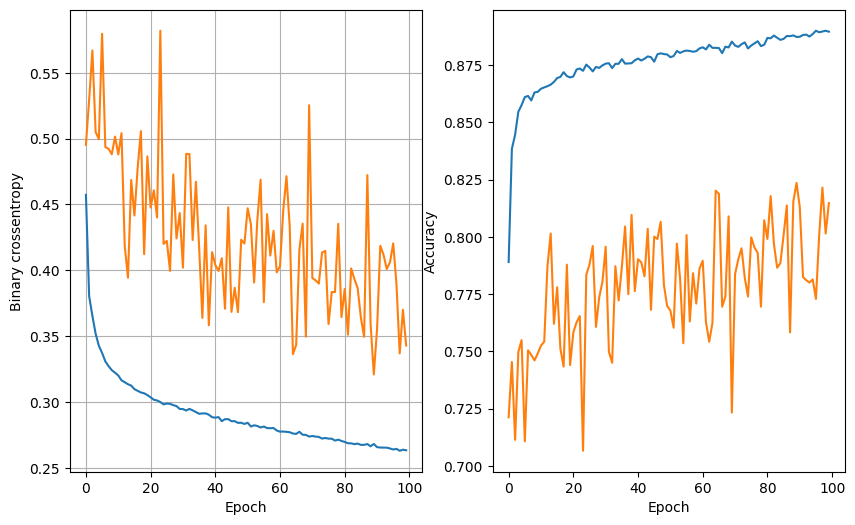

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8771 - loss: 0.3002
nodes: 64,dropout: 0.2 lr: 0.005 batch_size: 128


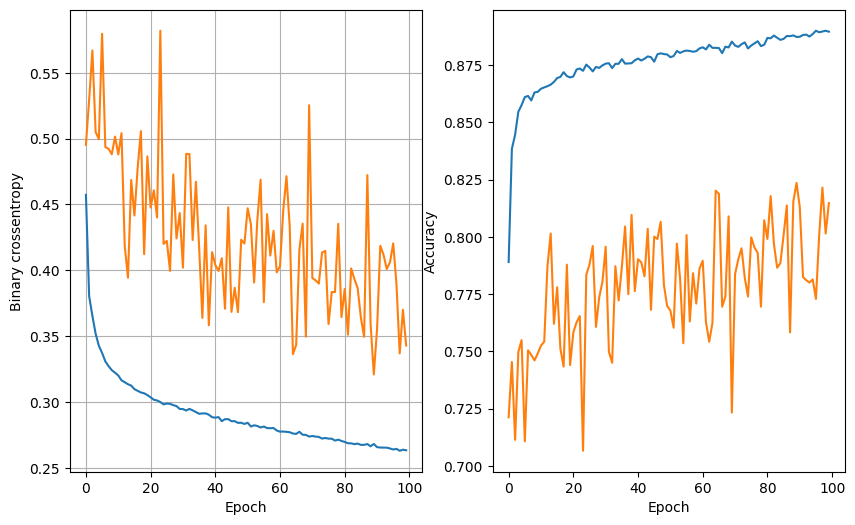

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8753 - loss: 0.3040
nodes: 64,dropout: 0.2 lr: 0.001 batch_size: 32


In [ ]:
least_val_loss = float('inf')
least_less_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"nodes: {num_nodes},dropout: {dropout_prob} lr: {lr} batch_size: {batch_size}")
                model , histroy = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid,Y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss =  val_loss
                    least_loss_model = model

In [52]:
Y_pred = least_loss_model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step


In [53]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81      1305
           1       0.88      0.93      0.91      2499

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



array([0, 1, 1, ..., 0, 1, 1])